In [ ]:
## Import dependencies
# Standard libraries
import pandas as pd
import numpy as np
import sys
import matplotlib.pyplot as plt
from Bio import SeqIO

# PyTorch libraries
import torch

# ESM3 and ESMC libraries
import esm
from huggingface_hub import login
from esm.models.esm3 import ESM3
from esm.sdk.api import ESM3InferenceClient, ESMProtein, GenerationConfig
from esm.models.esmc import LogitsConfig

In [2]:
# Load sklearn libraries for PCA
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.metrics import adjusted_rand_score

N_KMEANS_CLUSTERS = 3

In [ ]:
# Load the ESM-C embeddings
embeddings_path = "/home/azureuser/cloudfiles/code/Users/jc62/projects/direct_sequence_analysis/data/antiphage_sequences_embeddings.pt"
embeddings_orf_path = "/home/azureuser/cloudfiles/code/Users/jc62/projects/direct_sequence_analysis/data/orf1_and_2_sections_embeddings.pt"
embeddings = torch.load(embeddings_path)
embeddings_orf = torch.load(embeddings_orf_path)

In [4]:
# Compute and stack the mean embeddings
def mean_and_stack_embeddings(embeddings):
    embeddings_mean = [torch.mean(embeddings, dim=-2).squeeze() for embeddings in embeddings]
    stacked_mean_embeddings = torch.stack(embeddings_mean, dim=0)
    stacked_mean_embeddings_float32 = stacked_mean_embeddings.to(dtype=torch.float32).numpy()
    return stacked_mean_embeddings_float32

In [5]:
# Compute mean embeddings 
stacked_mean_embeddings_float32 = mean_and_stack_embeddings(embeddings)
stacked_mean_embeddings_orf_float32 = mean_and_stack_embeddings(embeddings_orf)

# Concatenante embeddings
stacked_mean_embeddings_all = np.concatenate((stacked_mean_embeddings_float32, stacked_mean_embeddings_orf_float32), axis=0)

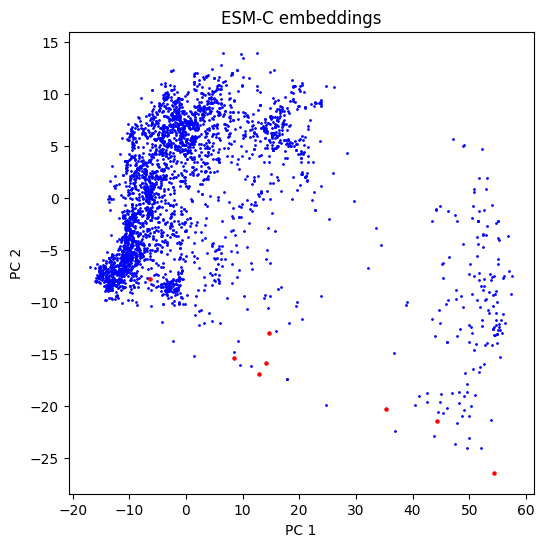

In [ ]:
# project all the embeddings to 2D using PCA
pca = PCA(n_components=2)
pca.fit(stacked_mean_embeddings_all)
projected_mean_embeddings = pca.transform(stacked_mean_embeddings_all)
projected_mean_embeddings_enumerate = enumerate(projected_mean_embeddings)

# plot the clusters using matplotlib
plt.figure(figsize=(6, 6))
plt.scatter(
    projected_mean_embeddings[:-8, 0],
    projected_mean_embeddings[:-8, 1],
    s=1,
    color='blue'
)

plt.scatter(
    projected_mean_embeddings[-8:, 0],
    projected_mean_embeddings[-8:, 1],
    s=5,  # make it bigger
    color='red',  # distinctive color
)

plt.title("ESM-C embeddings")
plt.xlabel("PC 1")
plt.ylabel("PC 2")
plt.show()

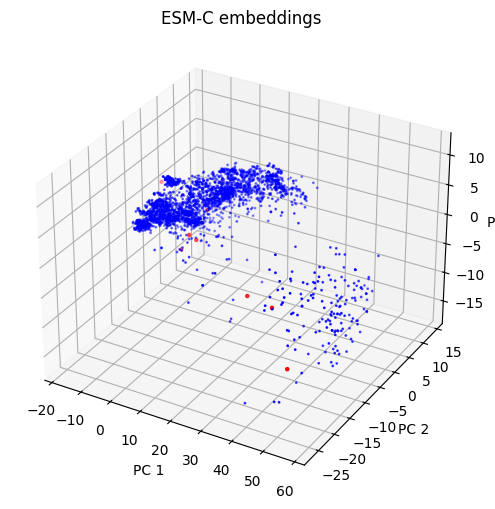

In [ ]:
# project all the embeddings to 3D using PCA
pca = PCA(n_components=3)
pca.fit(stacked_mean_embeddings_all)
projected_mean_embeddings = pca.transform(stacked_mean_embeddings_all)
projected_mean_embeddings_enumerate = enumerate(projected_mean_embeddings)

# Plot the clusters using matplotlib in 3D
fig = plt.figure(figsize=(6, 6))
ax = fig.add_subplot(111, projection='3d')

# Plot all points except the last one
ax.scatter(
    projected_mean_embeddings[:-8, 0],
    projected_mean_embeddings[:-8, 1],
    projected_mean_embeddings[:-8, 2],
    s=1,  # small size for other points
    color='blue'
)

# Highlight the last point (index 775)
ax.scatter(
    projected_mean_embeddings[-8:, 0],
    projected_mean_embeddings[-8:, 1],
    projected_mean_embeddings[-8:, 2],
    s=5,
    color='red',
)

ax.set_title("ESM-C embeddings")
ax.set_xlabel("PC 1")
ax.set_ylabel("PC 2")
ax.set_zlabel("PC 3")
plt.show()

In [17]:
# Load fasta meta information files
sequence_csv_path = "/home/azureuser/cloudfiles/code/Users/jc62/projects/direct_sequence_analysis/data/antiphage_sequences.csv"
sequence_csv_orf_path = "/home/azureuser/cloudfiles/code/Users/jc62/projects/direct_sequence_analysis/data/orf1_and_2_sections.csv"
sequence_meta_df = pd.read_csv(sequence_csv_path)
sequence_orf_df = pd.read_csv(sequence_csv_orf_path)

In [21]:
sequences = pd.concat([sequence_meta_df, sequence_orf_df], ignore_index=True)

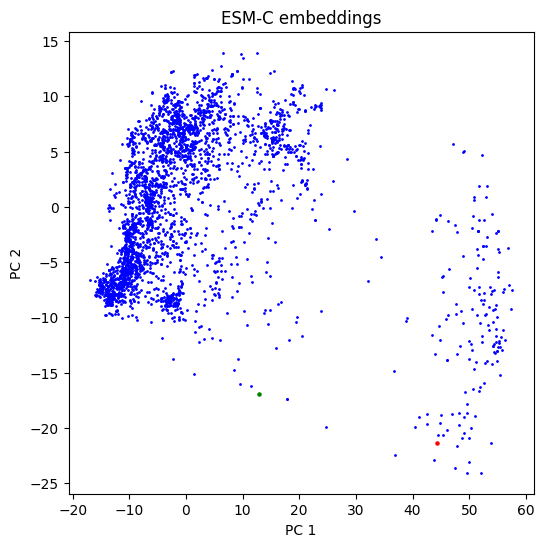

In [26]:
# project all the embeddings to 2D using PCA
pca = PCA(n_components=2)
pca.fit(stacked_mean_embeddings_all)
projected_mean_embeddings = pca.transform(stacked_mean_embeddings_all)
projected_mean_embeddings_enumerate = enumerate(projected_mean_embeddings)

# plot the clusters using matplotlib
plt.figure(figsize=(6, 6))
plt.scatter(
    projected_mean_embeddings[:-8, 0],
    projected_mean_embeddings[:-8, 1],
    s=1,
    color='blue'
)

plt.scatter(
    projected_mean_embeddings[-7, 0],
    projected_mean_embeddings[-7, 1],
    s=5,  # make it bigger
    color='red',  # distinctive color
)

plt.scatter(
    projected_mean_embeddings[-4, 0],
    projected_mean_embeddings[-4, 1],
    s=5,  # make it bigger
    color='green',  # distinctive color
)

plt.title("ESM-C embeddings")
plt.xlabel("PC 1")
plt.ylabel("PC 2")
# plt.savefig("/home/azureuser/cloudfiles/code/Users/jc62/projects/direct_sequence_analysis/data/neb10_proteome_embeddings_all_pca_3d.png", dpi=600, bbox_inches='tight')
plt.show()

In [65]:
# Assuming projected_mean_embeddings is a (776, 3) numpy array
target_point = projected_mean_embeddings[3310]
distances = np.linalg.norm(projected_mean_embeddings - target_point, axis=1)
output_array = np.column_stack((np.arange(len(distances)), distances))

# Sort by distance
sorted_output = output_array[np.argsort(output_array[:, 1])]

# Get the 5 closest (including the target itself at distance 0)
closest_5 = sorted_output[0:10]

In [68]:
for _ in closests:
    print(f"{sequences.loc[_]}")
    print(f"Distance: {closest_5[closest_5[:, 0] == _][0, 1]:.4f}\n")

id                                                 ORF2_wildtype
description                                        ORF2_wildtype
sequence       MRTMALWLGAVLMACGLGSASVSNEGLANERTPASNAAEAGESAAG...
Name: 3310, dtype: object
Distance: 0.0000

id             WP_223252149.1_Hachiman_antiphage_defense_syst...
description    WP_223252149.1_Hachiman_antiphage_defense_syst...
sequence       MFTDLKSSGEGGELLLYLLTERFLGLPQILCKMSLKTSAHYHGADG...
Name: 779, dtype: object
Distance: 1.5275

id                                                 ORF2_Domain_3
description                                        ORF2_Domain_3
sequence       PNDVANDSDGDGLGDQLEAALGTCASRTSSVAGVNCNGIADPRDTD...
Name: 3313, dtype: object
Distance: 1.5642

id             WP_384733547.1_Hachiman_antiphage_defense_syst...
description    WP_384733547.1_Hachiman_antiphage_defense_syst...
sequence       MFDKWLRPQDVEQPDGLLEYQLLADGGLIEDDELVERLGHEVIRNY...
Name: 1045, dtype: object
Distance: 3.4843

id                                           